In [1]:
import seaborn as sns
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot, plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.style.use("ggplot")
import cufflinks as cf
sns.set_style('whitegrid')

In [2]:
init_notebook_mode(connected=True)

In [3]:
dev_data = pd.read_csv(r"C:\Users\user\Documents\survey_results_public.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
cf.go_offline()

In [5]:
dev_data_sel_afr = dev_data[dev_data["Country"].isin(["Nigeria","South Africa",'Kenya',"Ghana"])]
dev_data_sel_afr["LanguageWorkedWith"].fillna("No Language",inplace=True)

In [6]:
dev_data_sel_afr.head(n=3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
252,254,I am a developer by profession,Yes,27.0,18,Monthly,200000.0,6588.0,Nigeria,Nigerian naira,NGN,Microsoft SQL Server;MongoDB;PostgreSQL;Redis,Microsoft SQL Server,"Developer, back-end;Developer, front-end;Devel...",Some college/university study without earning ...,Employed full-time,Black or of African descent,Man,How widely used or impactful my work output wo...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",C#;JavaScript;Python;TypeScript,C#;JavaScript;TypeScript,.NET Core;Node.js;TensorFlow;Xamarin,.NET;.NET Core,Jira;Github;Microsoft Teams;Microsoft Azure;Tr...,Github,Yes,Extremely important,Somewhat important,Curious about other opportunities;Wanting to w...,"Read company media, such as employee blogs or ...",Every few months,No,Yes,No,Often: 1-2 days per week or more,NaN,Annoyed,Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,20 to 99 employees,AWS;Docker;Heroku;Kubernetes;Microsoft Azure,NaN,I have little or no influence,NaN,Yes,"Yes, somewhat",A few times per week,Multiple times per day,Easy,Too long,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET;ASP.NET Core,A lot more welcome now than last year,40.0,3,Less than 1 year
448,450,I am a student who is learning to code,Yes,20.0,19,NaN,NaN,NaN,Kenya,NaN,NaN,Cassandra;MongoDB;MySQL;PostgreSQL,NaN,NaN,NaN,Student,Black or of African descent,Man,Diversity of the company or organization,NaN,"I’m not actively looking, but I am open to new...",C;C++;HTML/CSS;Java;JavaScript;Python;SQL,No Language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Start a free trial,Annoyed,Stack Overflow Jobs (for job seekers),Call a coworker or friend;Visit Stack Overflow...,MacOS,NaN,Google Cloud Platform;iOS;Windows,NaN,NaN,Straight / Heterosexual,NaN,NaN,NaN,NaN,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular;Angular.js;Django,NaN,NaN,NaN,Less than 1 year,NaN
547,549,I am a developer by profession,Yes,24.0,14,Monthly,3800.0,8544.0,Ghana,Ghanaian cedi,GHS,PostgreSQL;Redis;SQLite,MySQL;Redis;SQLite,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Black or of African descent,Man,Remote work options;How widely used or impactf...,Slightly dissatisfied,I am actively looking for a job,Dart;JavaScript;Kotlin;TypeScript,Java;JavaScript;Kotlin;TypeScript,Flutter,NaN,"Facebook Workplace;Trello;Google Suite (Docs, ...",Github;Facebook Workplace;Microsoft Azure;Trel...,No,Somewhat important,Fairly important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Once every few years,Yes,No,No,Often: 1-2 days per week or more,Start a free trial;Visit developer communities...,Annoyed,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,20 to 99 employees,Android;AWS;Docker;iOS,Android,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or so

In [7]:
dev_count = dev_data_sel_afr["Country"].value_counts()
total = dev_data_sel_afr["Country"].count()
dev_count
# Nigeria has the most devs, over 1400 devs from the countries filled the survery form

Nigeria         593
South Africa    494
Kenya           271
Ghana           105
Name: Country, dtype: int64

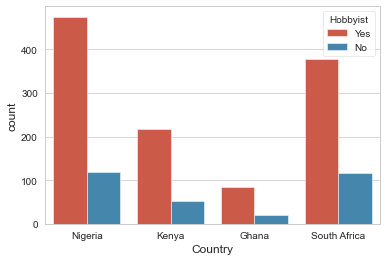

In [8]:
sns.countplot(x="Country", data=dev_data_sel_afr,hue="Hobbyist")

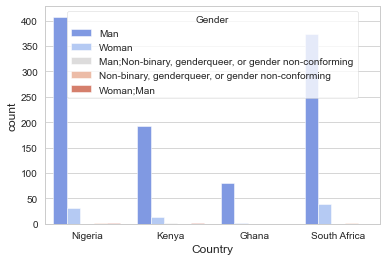

In [9]:
sns.countplot(x="Country", data=dev_data_sel_afr,hue="Gender",palette="coolwarm")

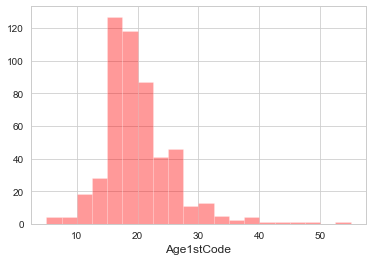

In [10]:
# Distribution for age which Nigerians started to code
Nigerians = dev_data_sel_afr[dev_data_sel_afr["Country"] == "Nigeria"]
sns.distplot(Nigerians["Age1stCode"],kde=False,color="red",bins=20)

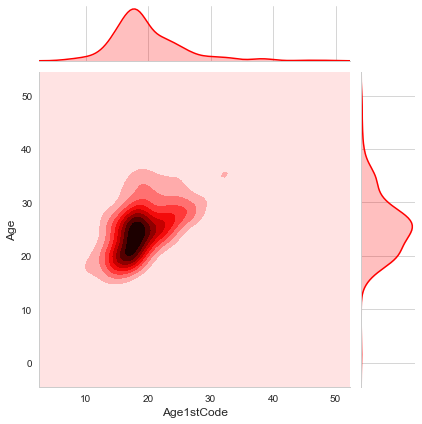

In [11]:
#interactive plot
sns.jointplot(data=Nigerians,x="Age1stCode",y="Age",kind="kde",color='red')

In [12]:
#interactive plotab
#most people get paid monthly in Nigeria
Nigerians["CompFreq"].value_counts()

Monthly    168
Yearly      30
Weekly       6
Name: CompFreq, dtype: int64

In [13]:
# operating system in  countries
dev_data_sel_afr["OpSys"].value_counts()

Windows        798
Linux-based    238
MacOS          212
BSD              1
Name: OpSys, dtype: int64

In [14]:
# Operating System use in Nigeria 
Nigerians['OpSys'].value_counts()

Windows        345
MacOS           80
Linux-based     64
BSD              1
Name: OpSys, dtype: int64

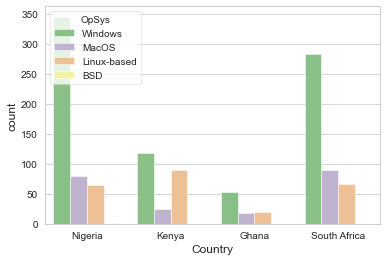

In [15]:
# Operating Systems plot
sns.countplot(x="Country", data=dev_data_sel_afr,hue="OpSys",palette="Accent")

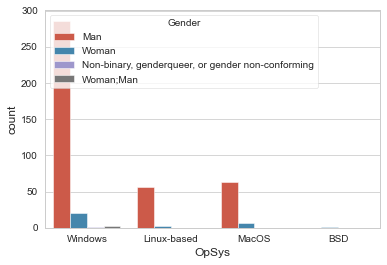

In [16]:
sns.countplot(x="OpSys", data=Nigerians,hue="Gender")

In [17]:
# Python devs from countries are 501
pythonistas = dev_data_sel_afr[dev_data_sel_afr["LanguageWorkedWith"].str.contains("Python")]
pythonistas["LanguageWorkedWith"].count()
# 501 people work with python

501

In [18]:
# Nigerian pythonistas that filled are 192
pythonistas_ng = Nigerians[Nigerians["LanguageWorkedWith"].str.contains("Python")]
pythonistas_ng["LanguageWorkedWith"].count()

192

In [19]:
# General C++ developers == 1092
seeplusplus = dev_data_sel_afr[dev_data_sel_afr["LanguageWorkedWith"].str.contains("C+")]
seeplusplus["LanguageWorkedWith"].count()

1092

In [20]:
# Nigerian C++ developer count == 440
seeplusplus_ng = Nigerians[Nigerians["LanguageWorkedWith"].str.contains("C+")]
seeplusplus_ng["LanguageWorkedWith"].count()

440

In [21]:
dev_data_sel_afr.groupby("Country")["ConvertedComp"].max()["Nigeria"]
# A Nigerian is the highest paid developer

1000000.0

In [22]:
dev_data_sel_afr.sort_values(by="ConvertedComp",inplace=True,ascending=False)
dev_data_sel_afr.groupby("Respondent")[["Country","ConvertedComp"]].head()
# South Africans Earn more 

,Country,ConvertedComp
59415,Nigeria,1000000.0
14719,Nigeria,1000000.0
10793,South Africa,960708.0
7234,South Africa,800592.0
46061,South Africa,608448.0
43710,South Africa,432324.0
23380,South Africa,400296.0
9916,South Africa,320232.0
60883,South Africa,320232.0
1524,South Africa,266864.0


limit_output extension: Maximum message size of 10000 exceeded with 124136 characters

In [23]:
dev_data_sel_afr["Age"].value_counts()

25.0    68
24.0    66
27.0    64
26.0    62
23.0    61
28.0    55
20.0    54
21.0    53
22.0    50
29.0    43
30.0    39
33.0    31
19.0    29
32.0    27
35.0    27
31.0    27
34.0    27
36.0    22
18.0    18
39.0    11
37.0    10
38.0    10
17.0     9
43.0     8
45.0     7
42.0     7
48.0     7
40.0     7
44.0     6
41.0     6
16.0     5
15.0     4
51.0     4
50.0     4
47.0     4
52.0     3
56.0     3
46.0     3
53.0     2
55.0     2
49.0     2
58.0     1
57.0     1
62.0     1
54.0     1
64.0     1
1.0      1
63.0     1
85.0     1
Name: Age, dtype: int64

In [24]:
dev_data_sel_afr["Age1stCode"].value_counts()

18                      166
19                      156
16                      125
17                      108
20                       99
15                       99
14                       67
21                       56
12                       50
22                       49
23                       41
25                       34
24                       33
13                       28
26                       23
10                       21
11                       19
27                       18
28                       15
30                       15
8                        12
29                        9
9                         9
5                         7
33                        6
7                         4
32                        4
40                        3
38                        3
Younger than 5 years      3
6                         3
34                        2
39                        2
37                        2
35                        2
48                  

In [25]:
dev_data_sel_afr.sort_values(by="WorkWeekHrs",inplace=True,ascending=False)
dev_data_sel_afr.groupby("Respondent")[["Country","WorkWeekHrs"]].head()
# Nigerians have the highest work time agg

,Country,WorkWeekHrs
60001,Ghana,168.0
58509,Nigeria,160.0
54664,South Africa,160.0
57678,Nigeria,150.0
19529,Nigeria,98.0
10797,South Africa,98.0
33461,Nigeria,96.0
58346,Nigeria,93.0
30574,South Africa,86.0
15702,Nigeria,84.0


limit_output extension: Maximum message size of 10000 exceeded with 122632 characters

In [26]:
dev_data_sel_afr["YearsCode"].value_counts().head()
# Most people have 3 to 6 years of experience

3    159
5    126
2    119
4    117
6     92
Name: YearsCode, dtype: int64

In [27]:
# Plot of years of experience in Nigeria

In [28]:
dev_data_sel_afr.groupby("Country")['Age'].describe()
# Stats for ages of developers in each country

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Ghana,63.0,25.793651,4.694399,18.0,22.0,25.0,28.5,36.0
Kenya,172.0,25.587209,6.313307,18.0,22.0,24.0,27.0,52.0
Nigeria,349.0,25.670487,5.896888,1.0,21.0,25.0,28.0,49.0
South Africa,371.0,32.099730,9.376121,15.0,25.5,30.0,36.0,85.0


In [29]:
# sns.countplot(dev_data_sel_afr["Ethnicity"])
dev_data_sel_afr["Ethnicity"].value_counts()

Black or of African descent                                                 786
White or of European descent                                                277
Multiracial                                                                   7
South Asian                                                                   4
Middle Eastern                                                                2
Black or of African descent;Biracial                                          2
East Asian                                                                    2
Black or of African descent;White or of European descent                      1
Black or of African descent;White or of European descent;Southeast Asian      1
East Asian;Middle Eastern;South Asian;Southeast Asian                         1
Black or of African descent;Biracial;Multiracial                              1
East Asian;White or of European descent;Biracial                              1
East Asian;Biracial                     

In [30]:
grouping_ethnicity = dev_data_sel_afr["Ethnicity"].apply(lambda x: "Other" if x != ('Black or of African descent') and x != ("White or of European descent") else x)

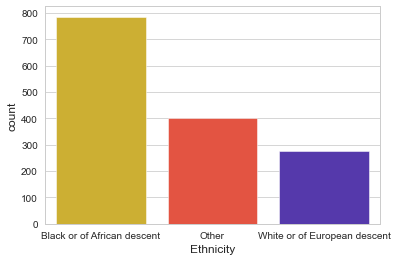

In [41]:
sns.countplot(grouping_ethnicity,palette="CMRmap_r")